In [8]:
import pandas as pd
from matplotlib.font_manager import FontProperties

df = pd.read_csv('/Users/mariamorandini/Desktop/stats/2 sem/DS/cw_1_ds/data/raw/accoglienza.csv')
df.columns
df = df.drop(columns=['CodiceRegione', 'DenominazioneRegione'])
df.columns = ['Regione', 'Data_Report', 'Immigrati presenti negli hot spot', 'Immigrati presenti nei centri di accoglienza', 'Immigrati presenti nei centri SIPROIMI', 'Immigrati presenti nei centri SAI']

# Convert 'Date' to datetime and extract the year
df['Data_Report'] = pd.to_datetime(df['Data_Report']).dt.year

# Group by 'Region' and 'Year' and sum the values
summary = df.groupby(['Regione', 'Data_Report']).agg({'Immigrati presenti negli hot spot': 'sum', 'Immigrati presenti nei centri di accoglienza': 'sum', 'Immigrati presenti nei centri SIPROIMI': 'sum', 'Immigrati presenti nei centri SAI':'sum' }).reset_index()



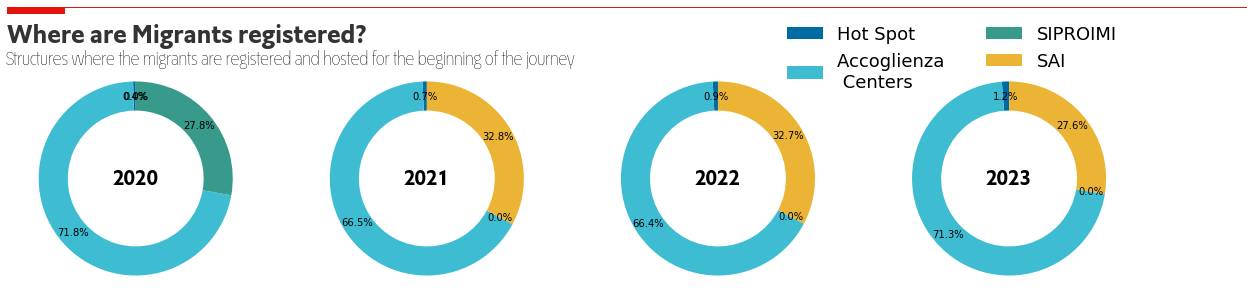

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
font_path = '../data/econosans/ecosans-bol.woff2.ttf'  # Update this path
custom_font = FontProperties(fname=font_path, size=35)
font_path2 = '../data/econosans/EconoSansReduced-35Thin.ttf' 
custom_font2 = FontProperties(fname=font_path2, size=100)

years_of_interest = [2020, 2021, 2022, 2023]
fig, axes = plt.subplots(1, 4, figsize=(20, 5)) 

labels = ['Hot Spot', 'Accoglienza \n Centers', 'SIPROIMI', 'SAI']
colors = ['#006BA2', '#3EBCD2', '#379A8B', '#EBB434']



for i, year in enumerate(years_of_interest):

    data_for_year = df[df['Data_Report'] == year]
    data_for_year = data_for_year[['Regione', 'Immigrati presenti negli hot spot', 'Immigrati presenti nei centri di accoglienza', 'Immigrati presenti nei centri SIPROIMI', 'Immigrati presenti nei centri SAI']]
    values = data_for_year.sum(numeric_only=True)

    wedges, texts, autotexts = axes[i].pie(
        values, 
        #labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors, 
        wedgeprops=dict(width=0.3),
        pctdistance=0.85, 
        radius = 1
    )


    axes[i].text(0, 0, f'{year}', ha='center', va='center', fontsize=20, fontproperties=custom_font)

    axes[i].plot([0.12, 0.98], [0.98, 0.98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=0.6)
    axes[i].add_patch(plt.Rectangle((0.12, 0.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth=0))

    #axes
fig.legend(labels, loc='lower left', ncol= 2,  bbox_to_anchor=(0.65, 0.7), frameon=False, fontsize=18)

fig.text(
    0.12, 0.88, "Where are Migrants registered?", fontweight="bold", fontproperties=custom_font,
    transform=fig.transFigure, 
    ha='left', fontsize=25,  alpha=.8)

fig.text(
    0.12, 0.82, "Structures where the migrants are registered and hosted for the beginning of the journey", 
    fontsize=18, fontproperties=custom_font2
)

fig.patch.set_facecolor('white')
#plt.tight_layout()
#fig.text(x=0.12, y=0.2, s="""Source: Cruscotto statistico giornaliero via www.libertaciviliimmigrazione.dlci.interno.gov.it/it""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7, fontproperties=custom_font2)
plt.savefig('../outputs/pies.png', bbox_inches='tight', dpi=300)
plt.show()
